In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/processed/clv_table_data.parquet")
df.head()

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,recency,customer_age,payment_method_count,future_spend
0,3,12,11,25,20243575.0,963979.761905,2021-01-10 07:56:16.844494,2021-12-12 12:35:12.844494,1682687155506000,30729823155506000,2,2998828.0
1,8,5,1,9,3237281.0,539546.833333,2021-02-13 09:47:39.656991,2021-12-14 20:12:39.656991,1482440343009000,27785540343009000,2,1521320.0
2,9,3,0,5,3206995.0,641399.000000,2021-06-27 01:51:48.421034,2021-11-08 04:42:31.421034,4648648578966000,16236491578966000,2,906635.0
3,15,1,1,1,127423.0,127423.000000,2021-06-12 04:30:42.105040,2021-06-12 04:30:42.105040,17522957894960000,17522957894960000,1,73320.0
4,18,7,11,16,12794750.0,913910.714286,2021-02-01 17:46:18.010289,2021-11-29 19:50:58.010289,2779741989711000,28793621989711000,2,1980302.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           36086 non-null  int64         
 1   transaction_count     36086 non-null  int64         
 2   promo_code_used       36086 non-null  int64         
 3   quantity              36086 non-null  int64         
 4   total_spent           36086 non-null  float64       
 5   avg_order_value       36086 non-null  float64       
 6   first_purchase_date   36086 non-null  datetime64[ns]
 7   last_purchase_date    36086 non-null  datetime64[ns]
 8   recency               36086 non-null  int64         
 9   customer_age          36086 non-null  int64         
 10  payment_method_count  36086 non-null  int64         
 11  future_spend          36086 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(7)
memory usage: 3.3 MB


In [3]:
df["last_purchase_date"].max()

Timestamp('2021-12-31 23:59:43.528545')

In [4]:
df.tail(20)

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,recency,customer_age,payment_method_count,future_spend
36066,99948,3,2,3,798794.0,2.662647e+05,2021-03-16 20:02:52.139749,2021-11-23 19:58:28.139749,3297691860251000,25070227860251000,2,294534.0
36067,99949,2,2,2,765185.0,3.825925e+05,2021-01-09 05:50:23.220400,2021-07-18 05:56:08.220400,14407431779600000,30823776779600000,1,970272.0
36068,99952,1,0,2,1273030.0,6.365150e+05,2021-08-23 13:58:54.045144,2021-08-23 13:58:54.045144,11268065954856000,11268065954856000,1,296175.0
36069,99953,2,0,2,955343.0,4.776715e+05,2021-03-24 23:26:10.636262,2021-09-06 00:13:37.636262,10107982363738000,24366829363738000,2,95891.0
36070,99959,3,1,3,625359.0,2.084530e+05,2021-07-19 05:51:18.428514,2021-11-22 12:08:33.428514,3412286571486000,14321321571486000,1,2851924.0
36071,99960,2,1,12,5089244.0,2.544622e+06,2021-03-19 08:41:38.119026,2021-11-25 12:29:06.119026,3151853880974000,24851901880974000,2,0.0
36072,99967,6,14,38,104610894.0,4.548300e+06,2021-02-21 23:49:25.411236,2021-12-07 03:03:23.411236,2148996588764000,27043834588764000,2,1664212.0
36073,99970,1,3,3,2249115.0,7.497050e+05,2021-07-01 12:05:06.406539,2021-07-01 12:05:06.406539,15854093593461000,15854093593461000,1,418890.0
36074,99976,33,14,65,32234097.0,7.496302e+05,2021-01-10 00:52:35.610429,2021-12-28 05:28:40.610429,325879389571000,30755244389571000,5,14300064.0
36075,99978,6,10,16,16239797.0,1.082653e+06,2021-01-08 11:36:33.348117,2021-12-29 16:03:37.348117,201382651883000,30889406651883000,2,192593.0


In [5]:
df.duplicated().any()

False

__Future spend(our target) description. About 25% did not spend again__

In [6]:
df["future_spend"].describe()

count    3.608600e+04
mean     2.275011e+06
std      3.814080e+06
min      0.000000e+00
25%      0.000000e+00
50%      7.180870e+05
75%      2.811686e+06
max      5.152548e+07
Name: future_spend, dtype: float64

__Distribution of average spending per customer__

In [7]:
(df["total_spent"] / df["transaction_count"]).describe()

count    3.608600e+04
mean     1.738991e+06
std      6.019733e+06
min      2.745000e+04
25%      2.902960e+05
50%      5.414944e+05
75%      1.322951e+06
max      4.239979e+08
dtype: float64

__The data is skewed a lot to the right, very few customers spent a lot, not out of the ordinary. A small number of customers spend really large amounts__

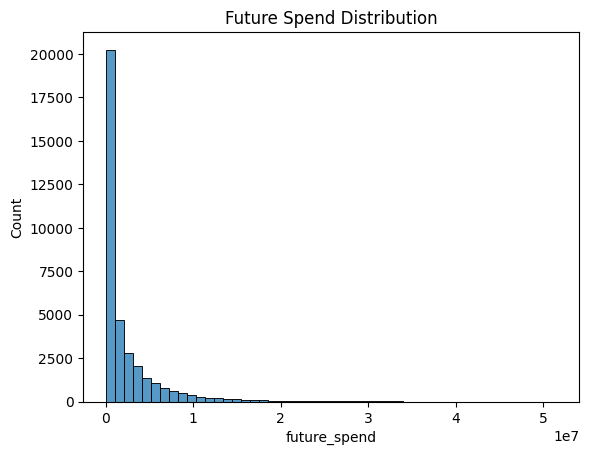

In [8]:
plt.figure()
sns.histplot(df["future_spend"], bins=50)
plt.title("Future Spend Distribution")
plt.show()


__Here's a brief comparison of transactions between customers that made and those that didn't make a transaction during the prediction window__

In [9]:
df.groupby(df["future_spend"] > 0)[
    ["transaction_count", "total_spent", "recency", "customer_age"]
].mean()


,transaction_count,total_spent,recency,customer_age
future_spend,,,,
False,1.281322,2.272575e+06,1.272047e+16,1.835904e+16
True,8.789257,1.538506e+07,3.807273e+15,2.422946e+16


__Distribution of features shows that higher value customers make more transactions and are very few, which is normal__

__Most customers use about about 1-2 payment methods__

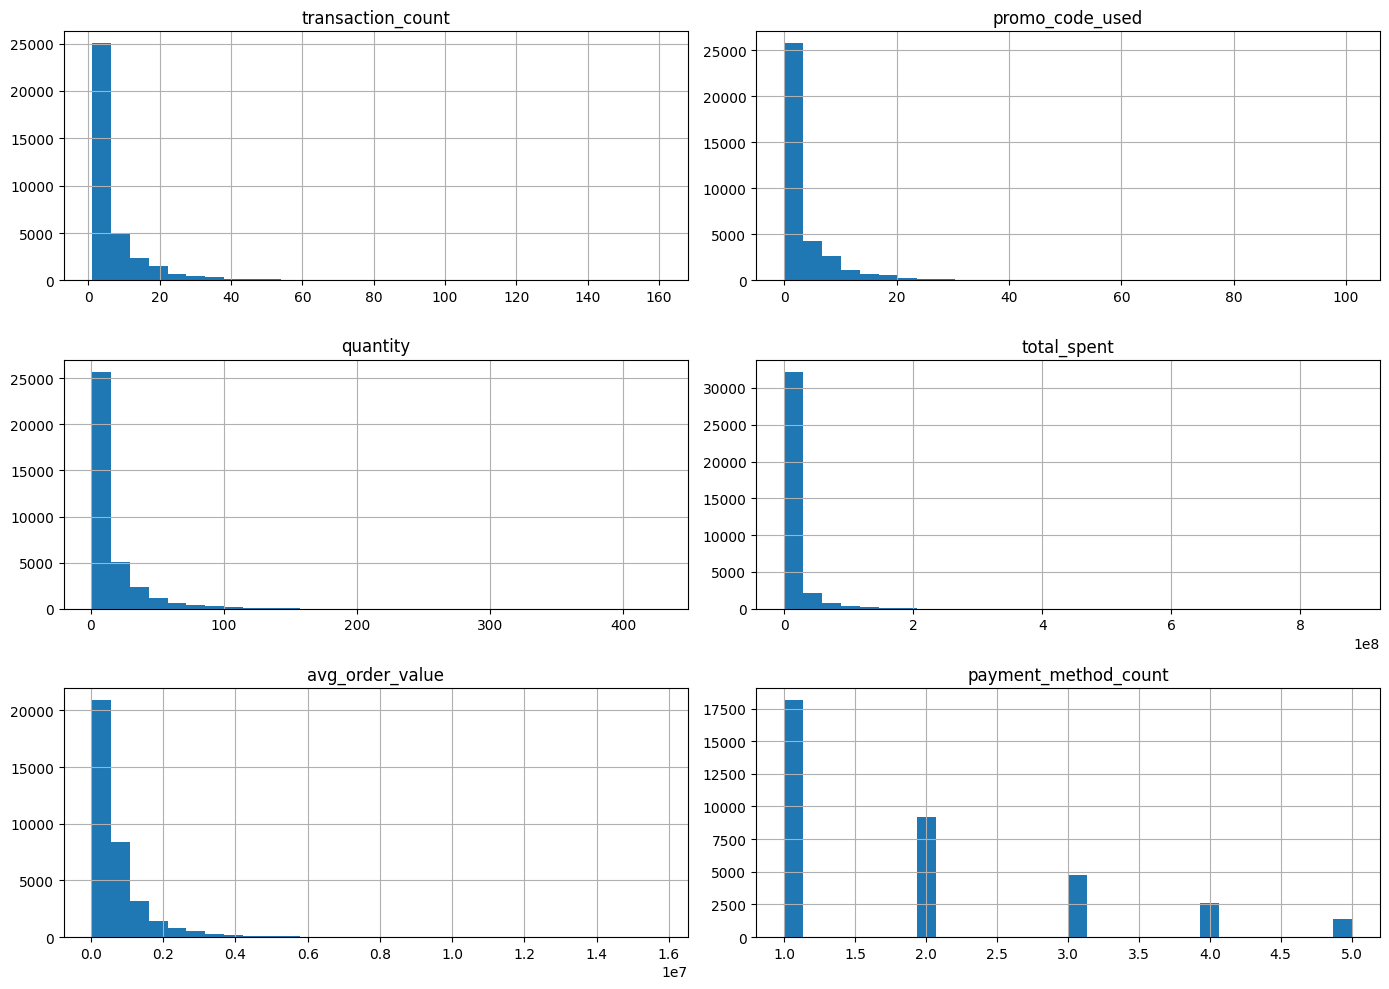

In [10]:
num_cols = [
    "transaction_count",
    "promo_code_used",
    "quantity",
    "total_spent",
    "avg_order_value",
    "payment_method_count"
]

df[num_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()


__Let's check out how some of our features relate with the future spend of a customer using the RFM approach__
+ Recency: Time since last transaction
+ Frequency: Number of transactions made within a historical period
+ Monetary: How much has been spent so far


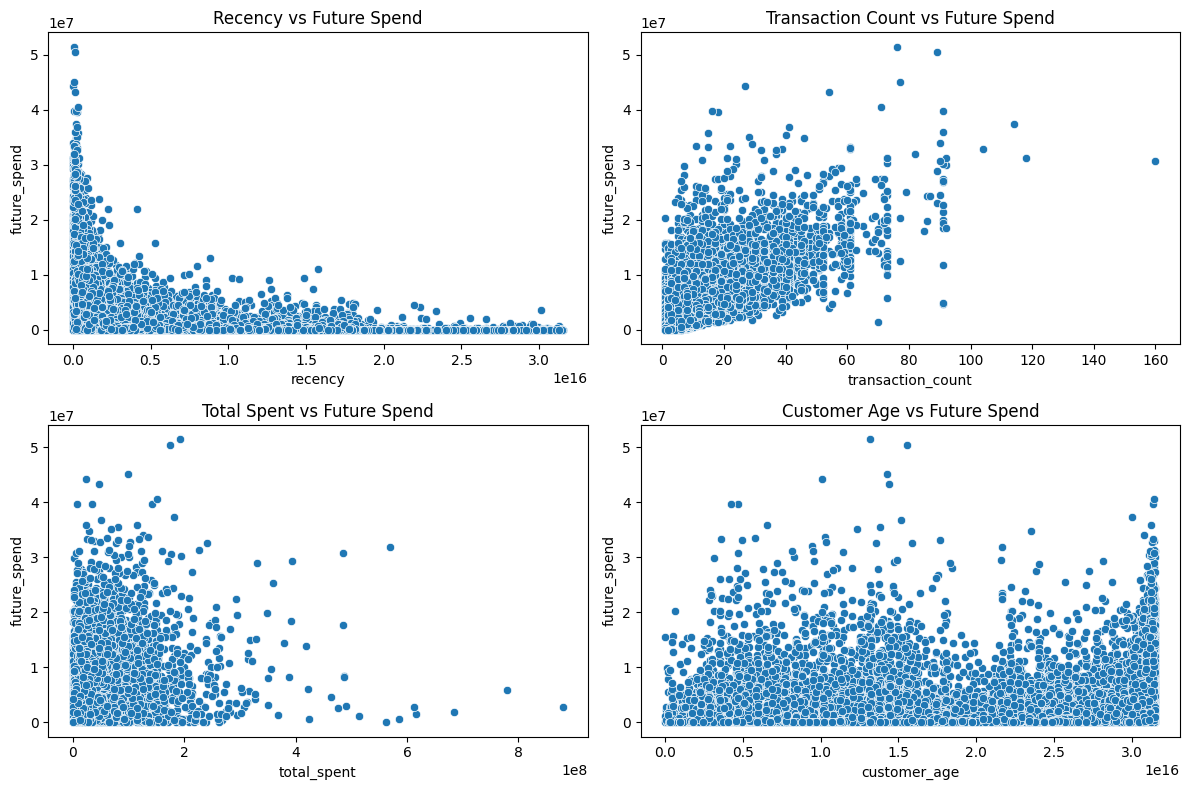

In [11]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(x=df["recency"], y=df["future_spend"], ax=axes[0, 0])
axes[0, 0].set_title("Recency vs Future Spend")

sns.scatterplot(x=df["transaction_count"], y=df["future_spend"], ax=axes[0, 1])
axes[0, 1].set_title("Transaction Count vs Future Spend")

sns.scatterplot(x=df["total_spent"], y=df["future_spend"], ax=axes[1, 0])
axes[1, 0].set_title("Total Spent vs Future Spend")

sns.scatterplot(x=df["customer_age"], y=df["future_spend"], ax=axes[1, 1])
axes[1, 1].set_title("Customer Age vs Future Spend")

plt.tight_layout()
plt.show()

#### 1. Recency vs Future Spend
- A strong inverse relationship is observed between recency and future spend.
- Customers who purchased more recently tend to have significantly higher future spend.

__Recency is a strong signal for customer engagement and future value.__


#### 2. Transaction Count vs Future Spend
- Customers with higher transaction counts generally spend more in the future, but with high variance.
- High transaction volume alone does not guarantee high future spend.


#### 3. Total Historical Spend vs Future Spend
- Total historical spend shows a weak-to-moderate positive relationship with future spend.



#### 4. Customer Age vs Future Spend
- Customer age shows little to no clear correlation with future spend.





Taking the Recency-Frequency-Monetary plot into consideration:
- Recency is the strongest individual predictor of how much a customer will spend in the future.
- Frequency and monetary features add value but exhibit high variance.